# 数据可视化

## 导入数据

In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
zhfont = FontProperties(fname='/notebooks/xkcd/Muyao-Softbrush.ttf', size=16)

In [142]:
df = pd.read_csv('./data/logs.csv')
df = df.dropna(axis = 0, how ='any') 
df.info()
type(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280059 entries, 0 to 280062
Data columns (total 10 columns):
day         280059 non-null object
time        280059 non-null object
domain      280059 non-null object
ip          280059 non-null object
port        280059 non-null object
city_id     280059 non-null float64
country     280059 non-null object
province    280059 non-null object
city        280059 non-null object
operator    280059 non-null object
dtypes: float64(1), object(9)
memory usage: 23.5+ MB


pandas.core.frame.DataFrame

## 生成数据

In [141]:
out_dir = './data'

### 国际分布

In [285]:
df_global = df.groupby(['country']).count().sort_values(['domain'], ascending=False)['domain']
df_global

country
中国     188080
美国      86471
0        4041
爱尔兰       366
瑞典        262
智利        253
比利时       243
新加坡       101
加拿大        72
德国         68
印度         54
日本         44
新西兰         2
波兰          2
Name: domain, dtype: int64

In [287]:
[items for items in df_global.iteritems()]

[('中国', 188080),
 ('美国', 86471),
 ('0', 4041),
 ('爱尔兰', 366),
 ('瑞典', 262),
 ('智利', 253),
 ('比利时', 243),
 ('新加坡', 101),
 ('加拿大', 72),
 ('德国', 68),
 ('印度', 54),
 ('日本', 44),
 ('新西兰', 2),
 ('波兰', 2)]

### 国内分布
中国各省分布情况

In [181]:
china_province = ['北京', '天津', '上海', '重庆', '河南省', '安徽省', '福建省', '甘肃省', '贵州省', '海南省', '河北省', '黑龙江省', '湖北省', '湖南省', '吉林省', '江苏省','江西省', '辽宁省', '青海省', '山东省', '山西省', '陕西省', '四川省', '云南省', '浙江省', '台湾省', '台湾', '广东省', '广西壮族自治区', '内蒙古自治区', '宁夏回族自治区', '西藏藏族自治区', '新疆维吾尔自治区', '香港', '澳门']

In [288]:
df_cn = df[df['province'].isin(china_province)]
data_province = df_cn.groupby(['province']).count().sort_values(['domain'], ascending=False)['domain']

[items for items in data_province.iteritems()]

[('广东省', 54558),
 ('台湾省', 49564),
 ('上海', 37677),
 ('北京', 14690),
 ('浙江省', 9062),
 ('江苏省', 4226),
 ('河北省', 4216),
 ('天津', 4017),
 ('福建省', 2358),
 ('香港', 1667),
 ('山东省', 1427),
 ('江西省', 1119),
 ('湖南省', 863),
 ('河南省', 847),
 ('湖北省', 377),
 ('黑龙江省', 341),
 ('海南省', 226),
 ('四川省', 101),
 ('山西省', 38),
 ('安徽省', 36),
 ('辽宁省', 34),
 ('陕西省', 32),
 ('贵州省', 28),
 ('吉林省', 27),
 ('重庆', 1)]

### 域名排行

In [293]:
from IPy import IP
def is_domain(domain):
    try:
        IP(domain)
        return False
    except Exception as _:
        return True


def domain_root_name(domain):
    try:
        arr = domain.split('.')
        if len(arr) >= 2:
            return '.'.join(arr[-2:])
        else:
            return domain
    except Exception as err:
        print('error, not a valid domain: {}'.format(str(err)))
        return domain

df_company = df[df['domain'].apply(lambda x: is_domain(x))]
df_company['company'] = df_company['domain'].map(lambda x: domain_root_name(x))
head_count = 15
df_company_all = df_company.groupby(['company']).count().sort_values(['time'], ascending=False)['time']
df_company_head = df_company_all.head(head_count)
new_row = pd.Series([df_company_all[head_count:].sum()], index=['other'])
df_company_rank = pd.concat([df_company_head, new_row])

/Users/kaboom/.pyenv/versions/3.6.5/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


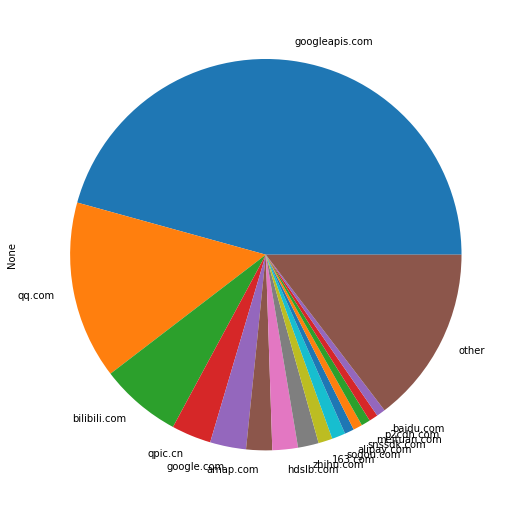

In [294]:
df_company_rank.plot(kind='pie', figsize = (9,9))

In [297]:
[items for items in df_company_rank.iteritems()]

[('googleapis.com', 79979),
 ('qq.com', 25716),
 ('bilibili.com', 11771),
 ('qpic.cn', 5735),
 ('google.com', 5207),
 ('amap.com', 3749),
 ('hdslb.com', 3693),
 ('zhihu.com', 2994),
 ('163.com', 2042),
 ('sogou.com', 1952),
 ('alipay.com', 1364),
 ('snssdk.com', 1317),
 ('meituan.com', 1298),
 ('p2cdn.com', 1287),
 ('baidu.com', 1274),
 ('other', 25598)]

### 使用端口排行

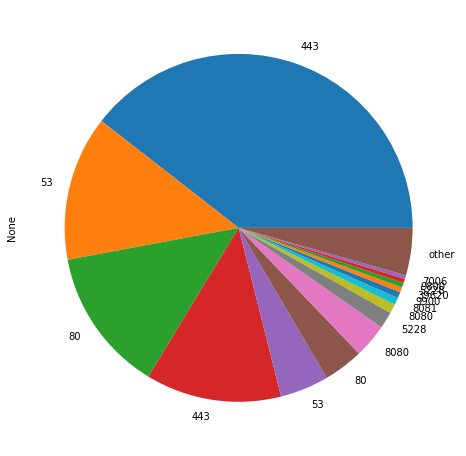

In [298]:
head_count = 15
df_port_all = df.groupby(['port']).count().sort_values(['time'], ascending=False)['time']
df_port_head = df_port_all.head(head_count)

new_row = pd.Series([df_port_all[head_count:].sum()], index=['other'])

vis_data_ports = pd.concat([df_port_head, new_row])
vis_data_ports.plot(kind='pie', figsize = (8,8))

In [299]:
[items for items in vis_data_ports.iteritems()]

[(443, 110535),
 (53, 37725),
 (80, 37469),
 ('443', 35307),
 ('53', 12649),
 ('80', 10404),
 (8080, 8854),
 (5228, 4363),
 ('8080', 2401),
 (8081, 1881),
 (9900, 1576),
 (39620, 1321),
 ('5228', 1218),
 (9800, 1068),
 (7006, 959),
 ('other', 12329)]

### 在晚上谁最活跃

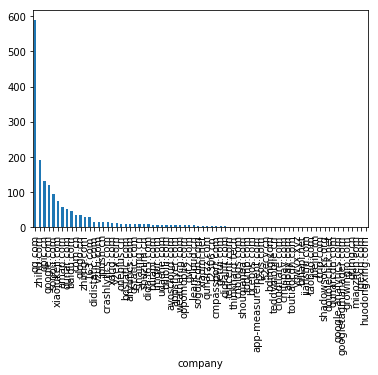

In [275]:
def is_night(time_stamp):
    night = (0, 6)
    arr = time_stamp.split(':')
    hour = int(arr[0])
    return night[0] < hour < night[1]

df_night = df_company[df_company['time'].apply(lambda x: is_night(x))]
df_night.groupby(['company']).count().sort_values(['time'], ascending=False)['time'][1:].plot(kind='bar')

### 每日请求数量

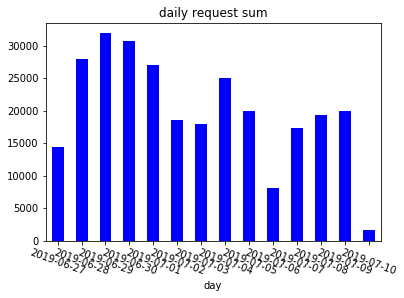

In [276]:
## 柱状图，每日请求数量
df.groupby(['day']).count()['domain'].plot(kind='bar', color='b', title='daily request sum', rot=-20)

### 运营商分布

In [300]:
data_vis_operator = df_company.groupby(['operator']).count().sort_values(['time'], ascending=False)['time']
[items for items in data_vis_operator.iteritems()]

[('谷歌', 84301),
 ('电信', 76497),
 ('阿里巴巴', 6031),
 ('联通', 4318),
 ('0', 1408),
 ('阿里云', 1003),
 ('移动', 606),
 ('脸书', 323),
 ('亚马逊', 222),
 ('内网IP', 210),
 ('阿卡迈', 22),
 ('教育网', 18),
 ('层峰网络', 7),
 ('香港宽频', 7),
 ('沃达丰', 2),
 ('Hurricane-Electric', 1)]

### 一加是不是 oppo 的亲儿子？

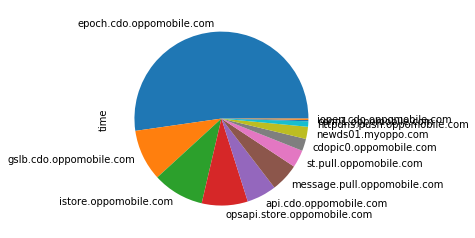

In [302]:
df_oppo = df_company[df_company['domain'].apply(lambda x: 'oppo' in x)]
df_oppo.groupby(['domain']).count().sort_values(['time'], ascending=False)['time'].plot(kind='pie')